In [1]:
# Loading the packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
from PIL import Image
from scipy import ndimage
from lr_utils import load_csv_dataset
from matplotlib import image

In [2]:
# Loading the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_csv_dataset()
train_set_x_orig.shape

(1646, 224, 224, 3)

y = [0] , it's a Non-Emergency vehicle


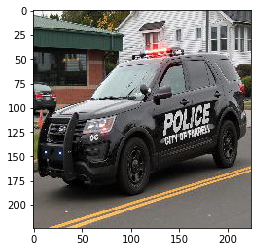

In [17]:
# Example of a picture
index = 5
plt.imshow(test_set_x_orig[index])
classes = {"[0]": "Non-Emergency", "[1]": "Emergency"}
s = str(test_set_y[:,index])
print("y = " + s + " , it's a " + classes[s] + " vehicle")

In [4]:
# Reshaping the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

# standardizing the dataset
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
print(train_set_x.shape)
print(test_set_x.shape)

(150528, 1646)
(150528, 706)


In [5]:
# sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [6]:
# initializing with zeros return parameters w, b
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [7]:
# propagation returns grads, cost
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagation
    A = sigmoid(np.dot(w.T,X) + b)  # shape is (1,m)
    cost = -1/m * np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    # backward propagation
    dz = A-Y
    dw = 1/m * np.dot(X,dz.T)
    db = 1/m * np.sum(dz)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

In [8]:
# optimization returns params, grads, costs
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w -= learning_rate*dw
        b -= learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)

        if print_cost and i%100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
        
    return params, grads, costs

In [73]:
# predict
def predict(w, b, X):
    
    m = X.shape[1]
    Y_predict = np.zeros((1,m), dtype=int)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_predict[0,i] = 1
        elif A[0,i]<=0.5:
            Y_predict[0,i] = 0
    return Y_predict

In [74]:
# model combining all functions returns d containing costs, Y_predict_test, Y_predict_train, w, b, learning_rate, num_iterations
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize params
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
    
    Y_predict_test = predict(w, b, X_test)
    Y_predict_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train-Y_train))*100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test-Y_test))*100))
    
    d = {"costs": costs, "Y_predict_test": Y_predict_test, "Y_predict_train": Y_predict_train,
        "w": w, "b": b, "learnig_rate": learning_rate, "num_iterations": num_iterations}
    
    return d

In [75]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.909467
Cost after iteration 200: 0.782822
Cost after iteration 300: 0.707248
Cost after iteration 400: 0.654977
Cost after iteration 500: 0.613387
Cost after iteration 600: 0.577493
Cost after iteration 700: 0.545191
Cost after iteration 800: 0.515461
Cost after iteration 900: 0.487733
Cost after iteration 1000: 0.461649
Cost after iteration 1100: 0.436958
Cost after iteration 1200: 0.413478
Cost after iteration 1300: 0.391070
Cost after iteration 1400: 0.369625
Cost after iteration 1500: 0.349064
Cost after iteration 1600: 0.329344
Cost after iteration 1700: 0.310489
Cost after iteration 1800: 0.292711
Cost after iteration 1900: 0.276851
train accuracy: 92.95261239368165 %
test accuracy: 64.16430594900851 %


In [78]:
dataset = pd.read_csv(r'train.csv')
values = dataset["image_names"]
print(dataset.dtypes)
np.array(values)


image_names         object
emergency_or_not     int64
dtype: object


array(['1503.jpg', '1420.jpg', '1764.jpg', ..., '1130.jpg', '1294.jpg',
       '860.jpg'], dtype=object)

In [79]:
test_predict = d["Y_predict_test"]
train_predict = d["Y_predict_train"]
print(test_predict.dtype)
print(test_predict.shape)

int32
(1, 706)


In [85]:
df = pd.read_csv("test_vc2kHdQ.csv")
df["emergency_or_not"] = test_predict.T
df.to_csv("predicts_a.csv", index = False)